**A1**

Converged in 130 epochs.


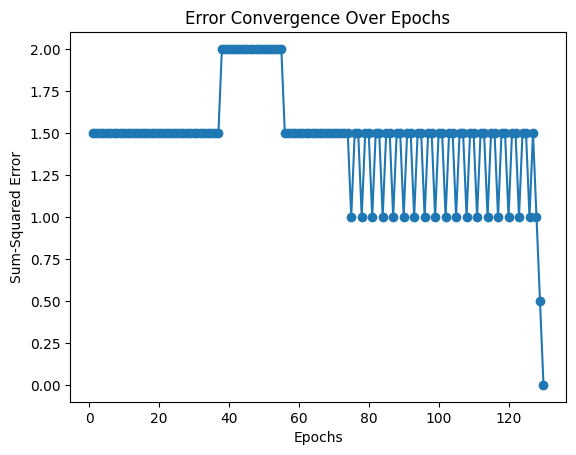

Final weights: [-0.1   0.1   0.05]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Provided initial weights
initial_weights = np.array([10, 0.2, -0.75])

# Input data for AND gate
input_data = np.array([
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

# Desired output for AND gate
desired_output = np.array([0, 0, 0, 1])

# Learning rate
learning_rate = 0.05

# Maximum number of epochs
max_epochs = 1000

# Error threshold for convergence
convergence_threshold = 0.002

# Function to calculate step activation
def step_activation(x):
    return 1 if x >= 0 else 0

# Function to train perceptron
def train_perceptron(input_data, desired_output, initial_weights, learning_rate, max_epochs, convergence_threshold):
    error_values = []

    weights = np.copy(initial_weights)

    for epoch in range(max_epochs):
        error_sum = 0

        for i in range(len(input_data)):
            # Calculate the predicted output
            prediction = step_activation(np.dot(input_data[i], weights))

            # Calculate the error
            error = desired_output[i] - prediction

            # Update weights
            weights = weights + learning_rate * error * input_data[i]

            # Accumulate the squared error for this sample
            error_sum += error ** 2

        # Calculate the sum-squared error for all samples in this epoch
        total_error = 0.5 * error_sum

        # Append error to the list for plotting
        error_values.append(total_error)

        # Check for convergence
        if total_error <= convergence_threshold:
            print(f"Converged in {epoch + 1} epochs.")
            break

    return weights, error_values

# Train the perceptron
final_weights, errors = train_perceptron(input_data, desired_output, initial_weights, learning_rate, max_epochs, convergence_threshold)

# Plotting epochs against error values
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Error Convergence Over Epochs')
plt.show()

# Display the final weights
print("Final weights:", final_weights)


**A2**

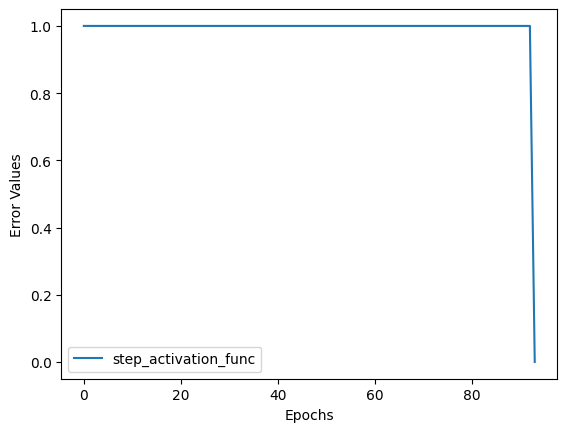

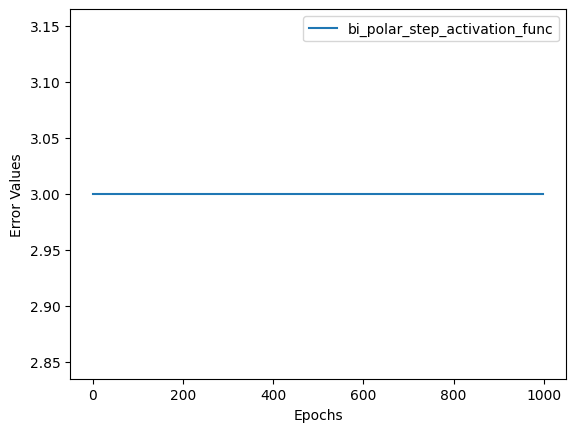

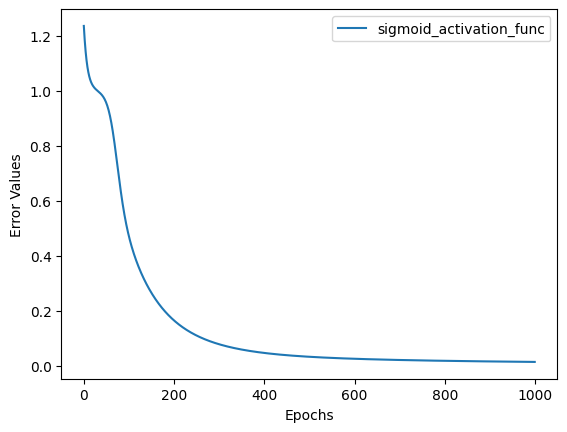

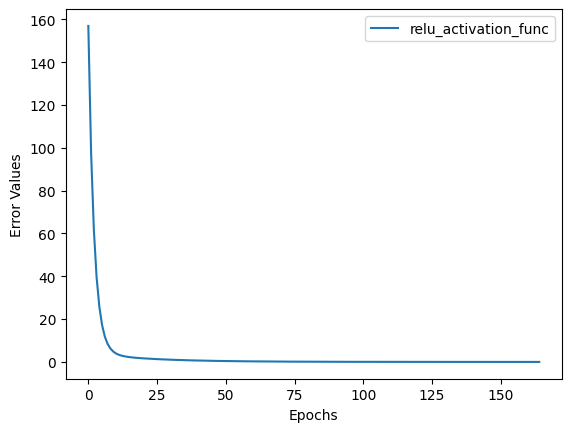

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Different activation functions
def step_activation_func(x):
    return 1 if x > 0 else 0

def bi_polar_step_activation_func(x):
    return -1 if x < 0 else 1

def sigmoid_activation_func(x):
    return 1 / (1 + np.exp(-x))

def relu_activation_func(x):
    return max(0, x)

# Perceptron class with modified variable names
class CustomPerceptron:
    def __init__(self, weights, learning_rate=0.05, max_iterations=1000, error_threshold=0.002):
        self.weights = weights
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.error_threshold = error_threshold

    def predict(self, inputs, activation_func):
        weighted_sum = np.dot(self.weights, inputs)
        return activation_func(weighted_sum)

    def train(self, training_inputs, training_outputs, activation_func):
        epochs = 0
        error_values = []
        while epochs < self.max_iterations:
            predictions = [self.predict(inputs, activation_func) for inputs in training_inputs]
            total_error = sum([(output - prediction)**2 for output, prediction in zip(training_outputs, predictions)])
            error_values.append(total_error)
            
            if total_error <= self.error_threshold:
                break
            
            for i in range(len(training_inputs)):
                prediction = self.predict(training_inputs[i], activation_func)
                # Convert training_inputs[i] to a NumPy array for element-wise multiplication
                input_array = np.array(training_inputs[i])
                # Update weights using NumPy array operations
                self.weights += self.learning_rate * (training_outputs[i] - prediction) * input_array
            
            epochs += 1
        
        return epochs, error_values

# Training and plotting with modified variable names
inputs = [[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]]
outputs = [0, 0, 0, 1]
initial_weights = [10, 0.2, -0.75]

activation_functions = [step_activation_func, bi_polar_step_activation_func, sigmoid_activation_func, relu_activation_func]
for activation_func in activation_functions:
    perceptron = CustomPerceptron(initial_weights, learning_rate=0.05)
    epochs, error_values = perceptron.train(inputs, outputs, activation_func)
    
    # Adjust epochs to match the length of error_values
    adjusted_epochs = len(error_values)

    # Plotting
    plt.plot(range(adjusted_epochs), error_values, label=activation_func.__name__)
    plt.xlabel('Epochs')
    plt.ylabel('Error Values')
    plt.legend()
    plt.show()


**A3**

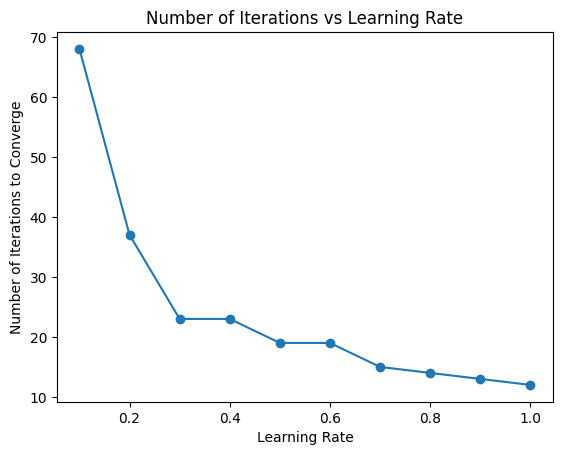

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Initial weights
initial_weights = np.array([10, 0.2, -0.75])

# Input data for AND gate
input_data = np.array([
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

# Desired output for AND gate
desired_output = np.array([0, 0, 0, 1])

# Varying learning rates
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Maximum number of epochs
max_epochs = 1000

# Convergence error threshold
convergence_error = 0.002

# Step activation function
def step_activation_func(x):
    return 1 if x >= 0 else 0

# Function to train perceptron
def train_perceptron(input_data, desired_output, initial_weights, learning_rate, max_epochs, convergence_error):
    for epoch in range(max_epochs):
        error_sum = 0

        for i in range(len(input_data)):
            # Calculate the predicted output
            prediction = step_activation_func(np.dot(input_data[i], initial_weights))

            # Calculate the error
            error = desired_output[i] - prediction

            # Update weights
            initial_weights = initial_weights + learning_rate * error * input_data[i]

            # Accumulate the squared error for this sample
            error_sum += error ** 2

        # Calculate the sum-squared error for all samples in this epoch
        total_error = 0.5 * error_sum

        # Check for convergence
        if total_error <= convergence_error:
            return epoch + 1  # Return the number of iterations to converge

    return max_epochs  # Return max_epochs if convergence is not reached

# List to store the number of iterations for each learning rate
iterations_list = []

# Train the perceptron for each learning rate
for alpha in learning_rates:
    iterations = train_perceptron(input_data, desired_output, initial_weights, alpha, max_epochs, convergence_error)
    iterations_list.append(iterations)

# Plotting the number of iterations against learning rates
plt.plot(learning_rates, iterations_list, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations to Converge')
plt.title('Number of Iterations vs Learning Rate')
plt.show()


**A4**

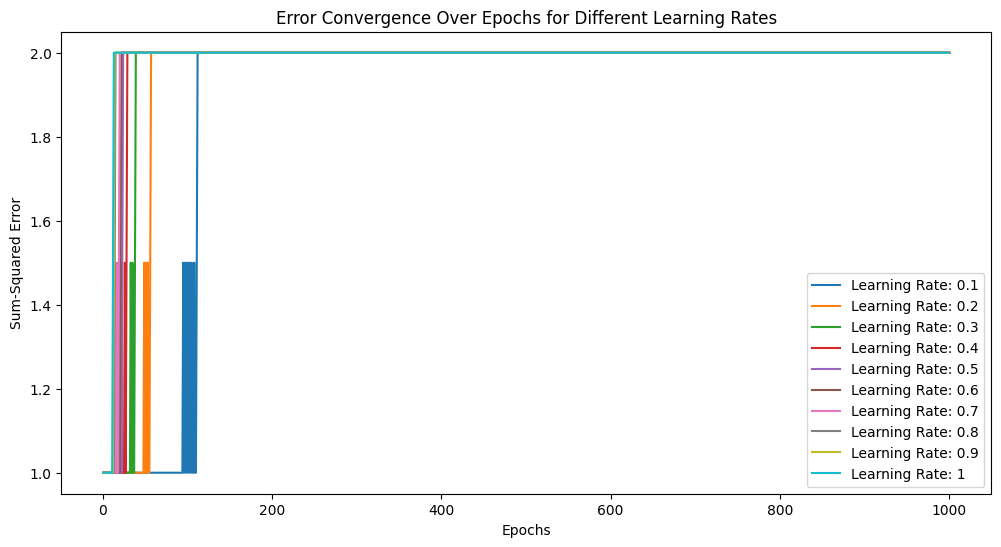

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Provided initial weights
W = np.array([10, 0.2, -0.75])

# Input data for XOR gate
X_xor = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Learning rate
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Function to calculate step activation
def step_activation(x):
    return 1 if x >= 0 else 0

# Function to train perceptron
def train_perceptron(X, y, W, alpha, max_epochs, convergence_error):
    error_values = []

    for epoch in range(max_epochs):
        error_sum = 0

        for i in range(len(X)):
            # Calculate the predicted output
            prediction = step_activation(np.dot(X[i], W))

            # Calculate the error
            error = y[i] - prediction

            # Update weights
            W = W + alpha * error * X[i]

            # Accumulate the squared error for this sample
            error_sum += error ** 2

        # Calculate the sum-squared error for all samples in this epoch
        total_error = 0.5 * error_sum

        # Append error to the list for plotting
        error_values.append(total_error)

    return error_values

# Train the perceptron for each learning rate and plot the number of iterations
plt.figure(figsize=(12, 6))
for alpha in alpha_values:
    errors = train_perceptron(X_xor, y_xor, W, alpha, max_epochs=1000, convergence_error=0.002)
    plt.plot(range(1, len(errors) + 1), errors, label=f'Learning Rate: {alpha}')

plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Error Convergence Over Epochs for Different Learning Rates')
plt.legend()
plt.show()


**A5**

In [5]:
import numpy as np

# Step 1: Data Preparation
data = np.array([
    [20, 6, 2, 1],
    [16, 3, 6, 1],
    [27, 6, 2, 1],
    [19, 1, 2, 0],
    [24, 4, 2, 1],
    [22, 1, 5, 0],
    [15, 4, 2, 1],
    [18, 4, 2, 1],
    [21, 1, 4, 0],
    [16, 2, 4, 0]
])

# Separate features and target
X = data[:, :-1]
y = data[:, -1]

# Step 2: Initialize Weights and Learning Rate
weights = np.random.rand(X.shape[1])
learning_rate = 0.01

# Step 3: Define Activation Function (Sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Step 4: Training the Perceptron
for epoch in range(1000):
    for i in range(X.shape[0]):
        # Forward pass
        z = np.dot(X[i], weights)
        prediction = sigmoid(z)
        
        # Calculate the error
        error = y[i] - prediction
        
        # Backpropagation
        weights += learning_rate * error * prediction * (1 - prediction) * X[i]

# Step 5: Evaluation
for i in range(X.shape[0]):
    z = np.dot(X[i], weights)
    prediction = sigmoid(z)
    print(f"Transaction {i+1}: Predicted High Value = {prediction > 0.5}")


Transaction 1: Predicted High Value = True
Transaction 2: Predicted High Value = True
Transaction 3: Predicted High Value = True
Transaction 4: Predicted High Value = False
Transaction 5: Predicted High Value = True
Transaction 6: Predicted High Value = False
Transaction 7: Predicted High Value = True
Transaction 8: Predicted High Value = True
Transaction 9: Predicted High Value = False
Transaction 10: Predicted High Value = False


**A6**

In [6]:
import numpy as np

# Step 1: Data Preparation
data = np.array([
    [20, 6, 2, 1],
    [16, 3, 6, 1],
    [27, 6, 2, 1],
    [19, 1, 2, 0],
    [24, 4, 2, 1],
    [22, 1, 5, 0],
    [15, 4, 2, 1],
    [18, 4, 2, 1],
    [21, 1, 4, 0],
    [16, 2, 4, 0]
])

# Separate features and target
X = data[:, :-1]
y = data[:, -1]

# Step 2: Compute Pseudo-Inverse
X_pseudo_inv = np.linalg.pinv(X)

# Step 3: Compute Weights
weights_pseudo_inv = np.dot(X_pseudo_inv, y)

# Step 4: Evaluation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

for i in range(X.shape[0]):
    z = np.dot(X[i], weights_pseudo_inv)
    prediction = sigmoid(z)
    print(f"Transaction {i+1}: Predicted High Value = {prediction > 0.5}")


Transaction 1: Predicted High Value = True
Transaction 2: Predicted High Value = True
Transaction 3: Predicted High Value = True
Transaction 4: Predicted High Value = False
Transaction 5: Predicted High Value = True
Transaction 6: Predicted High Value = True
Transaction 7: Predicted High Value = True
Transaction 8: Predicted High Value = True
Transaction 9: Predicted High Value = True
Transaction 10: Predicted High Value = True


**A7**

In [7]:
import numpy as np

# Define the AND gate input and output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

# Initialize weights and biases
np.random.seed(0)
input_layer_neurons = 2
hidden_layer_neurons = 2
output_neurons = 1
hidden_weights = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
hidden_bias = np.random.uniform(size=(1, hidden_layer_neurons))
output_weights = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
output_bias = np.random.uniform(size=(1, output_neurons))

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Back-propagation algorithm
def back_propagation(X, y, hidden_weights, hidden_bias, output_weights, output_bias, learning_rate):
    max_iterations = 10000
    convergence_error = 0.002
    for i in range(max_iterations):
        # Forward propagation
        hidden_layer_input = np.dot(X, hidden_weights) + hidden_bias
        hidden_layer_output = sigmoid(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, output_weights) + output_bias
        predicted_output = sigmoid(output_layer_input)

        # Backward propagation
        error = y - predicted_output
        if np.mean(np.abs(error)) <= convergence_error:
            print(f'Converged at iteration {i + 1}.')
            break
        output_delta = error * sigmoid_derivative(predicted_output)
        hidden_error = output_delta.dot(output_weights.T)
        hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)

        # Update weights and biases
        output_weights += hidden_layer_output.T.dot(output_delta) * learning_rate
        output_bias += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        hidden_weights += X.T.dot(hidden_delta) * learning_rate
        hidden_bias += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    return hidden_weights, hidden_bias, output_weights, output_bias

# Train the neural network
learning_rate = 0.05
trained_hidden_weights, trained_hidden_bias, trained_output_weights, trained_output_bias = back_propagation(
    X, y, hidden_weights, hidden_bias, output_weights, output_bias, learning_rate)

# Test the neural network
def predict(X, trained_hidden_weights, trained_hidden_bias, trained_output_weights, trained_output_bias):
    hidden_layer_input = np.dot(X, trained_hidden_weights) + trained_hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, trained_output_weights) + trained_output_bias
    predicted_output = sigmoid(output_layer_input)
    return np.round(predicted_output)

# Print the predictions
print("Input\t\tOutput")
for i in range(len(X)):
    prediction = predict(X[i], trained_hidden_weights, trained_hidden_bias, trained_output_weights, trained_output_bias)[0][0]
    print(f"{X[i]}\t\t{int(prediction)}")


Input		Output
[0 0]		0
[0 1]		0
[1 0]		0
[1 1]		1


**A8**

In [8]:
import numpy as np

# Define the XOR gate input and output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Initialize weights and biases
np.random.seed(0)
input_layer_neurons = 2
hidden_layer_neurons = 8  # Increase the number of neurons in the hidden layer
output_neurons = 1
hidden_weights = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
hidden_bias = np.random.uniform(size=(1, hidden_layer_neurons))
output_weights = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
output_bias = np.random.uniform(size=(1, output_neurons))

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Back-propagation algorithm
def back_propagation(X, y, hidden_weights, hidden_bias, output_weights, output_bias, learning_rate):
    max_iterations = 100000  # Increase the number of iterations
    convergence_error = 0.0001  # Decrease the convergence error
    for i in range(max_iterations):
        # Forward propagation
        hidden_layer_input = np.dot(X, hidden_weights) + hidden_bias
        hidden_layer_output = sigmoid(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, output_weights) + output_bias
        predicted_output = sigmoid(output_layer_input)

        # Backward propagation
        error = y - predicted_output
        if np.mean(np.abs(error)) <= convergence_error:
            print(f'Converged at iteration {i + 1}.')
            break
        output_delta = error * sigmoid_derivative(predicted_output)
        hidden_error = output_delta.dot(output_weights.T)
        hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)

        # Update weights and biases
        output_weights += hidden_layer_output.T.dot(output_delta) * learning_rate
        output_bias += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        hidden_weights += X.T.dot(hidden_delta) * learning_rate
        hidden_bias += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    return hidden_weights, hidden_bias, output_weights, output_bias

# Train the neural network
learning_rate = 0.05
trained_hidden_weights, trained_hidden_bias, trained_output_weights, trained_output_bias = back_propagation(
    X, y, hidden_weights, hidden_bias, output_weights, output_bias, learning_rate)

# Test the neural network
def predict(X, trained_hidden_weights, trained_hidden_bias, trained_output_weights, trained_output_bias):
    hidden_layer_input = np.dot(X, trained_hidden_weights) + trained_hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, trained_output_weights) + trained_output_bias
    predicted_output = sigmoid(output_layer_input)
    return predicted_output

# Print the predictions
print("Input\t\tOutput")
for i in range(len(X)):
    prediction = predict(X[i], trained_hidden_weights, trained_hidden_bias, trained_output_weights, trained_output_bias)[0][0]
    print(f"{X[i]}\t\t{prediction}")


Input		Output
[0 0]		0.010293160584643534
[0 1]		0.9877104505174088
[1 0]		0.9855177731906405
[1 1]		0.015397320939701352


**A9**

In [9]:
import numpy as np

# Define the AND gate input and output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0, 1], [0, 1], [0, 1], [1, 0]])  # Corrected output mapping

# Initialize weights and biases
np.random.seed(0)
input_layer_neurons = 2
hidden_layer_neurons = 4  # Increase the number of neurons in the hidden layer
output_neurons = 2
hidden_weights = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
hidden_bias = np.random.uniform(size=(1, hidden_layer_neurons))
output_weights = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
output_bias = np.random.uniform(size=(1, output_neurons))

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Back-propagation algorithm
def back_propagation(X, y, hidden_weights, hidden_bias, output_weights, output_bias, learning_rate):
    max_iterations = 10000  # Increase the number of iterations
    convergence_error = 0.002
    for i in range(max_iterations):
        # Forward propagation
        hidden_layer_input = np.dot(X, hidden_weights) + hidden_bias
        hidden_layer_output = sigmoid(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, output_weights) + output_bias
        predicted_output = sigmoid(output_layer_input)

        # Backward propagation
        error = y - predicted_output
        if np.mean(np.abs(error)) <= convergence_error:
            print(f'Converged at iteration {i + 1}.')
            break
        output_delta = error * sigmoid_derivative(predicted_output)
        hidden_error = output_delta.dot(output_weights.T)
        hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)

        # Update weights and biases
        output_weights += hidden_layer_output.T.dot(output_delta) * learning_rate
        output_bias += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        hidden_weights += X.T.dot(hidden_delta) * learning_rate
        hidden_bias += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    return hidden_weights, hidden_bias, output_weights, output_bias

# Train the neural network
learning_rate = 0.05
trained_hidden_weights, trained_hidden_bias, trained_output_weights, trained_output_bias = back_propagation(
    X, y, hidden_weights, hidden_bias, output_weights, output_bias, learning_rate)

# Test the neural network
def predict(X, trained_hidden_weights, trained_hidden_bias, trained_output_weights, trained_output_bias):
    hidden_layer_input = np.dot(X, trained_hidden_weights) + trained_hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, trained_output_weights) + trained_output_bias
    predicted_output = sigmoid(output_layer_input)
    return np.round(predicted_output)

# Print the predictions
print("Input\t\tOutput")
for i in range(len(X)):
    prediction = predict(X[i], trained_hidden_weights, trained_hidden_bias, trained_output_weights, trained_output_bias)
    print(f"{X[i]}\t\t{prediction}")


Input		Output
[0 0]		[[0. 1.]]
[0 1]		[[0. 1.]]
[1 0]		[[0. 1.]]
[1 1]		[[1. 0.]]


**A10**

In [10]:
from sklearn.neural_network import MLPClassifier
import numpy as np

# Define the AND gate input and output
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# Define the XOR gate input and output
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Function to train and test the model
def train_and_test(X, y, gate_name):
    clf = MLPClassifier(hidden_layer_sizes=(8,), activation='relu', max_iter=2000, random_state=1)
    clf.fit(X, y)
    print(f"{gate_name} Gate:")
    for i in range(len(X)):
        prediction = clf.predict([X[i]])
        print(f"{X[i]} => {prediction}")

# Train and test the model for the AND gate
train_and_test(X_and, y_and, "AND")

# Train and test the model for the XOR gate
train_and_test(X_xor, y_xor, "XOR")


AND Gate:
[0 0] => [0]
[0 1] => [0]
[1 0] => [0]
[1 1] => [1]
XOR Gate:
[0 0] => [0]
[0 1] => [1]
[1 0] => [1]
[1 1] => [0]


C:\Users\nossa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the datasets into the individual dataframes
yield_data = pd.read_csv("C:\\Users\\nossa\\Downloads\\PYTHON-E3\\PYTHON-E3\\yield.csv")
temp_data = pd.read_csv("C:\\Users\\nossa\\Downloads\\PYTHON-E3\\PYTHON-E3\\temp.csv")
rainfall_data = pd.read_csv("C:\\Users\\nossa\\Downloads\\PYTHON-E3\\PYTHON-E3\\rainfall.csv")
pesticides_data = pd.read_csv("C:\\Users\\nossa\\Downloads\\PYTHON-E3\\PYTHON-E3\\pesticides.csv")
yield_df = pd.read_csv("C:\\Users\\nossa\\Downloads\\PYTHON-E3\\PYTHON-E3\\yield_df.csv")

# Selecting the needed columns from yield_data
needed = ['Area', 'Item', 'Year', 'Value']
yield_data = yield_data[needed]

# Renaming columns in temp_data
temp_data.rename(columns={'year': 'Year', 'country': 'Area'}, inplace=True)

# Selecting the needed columns from pesticides_data
needed = ['Area', 'Year', 'Value']
pesticides_data = pesticides_data[needed]

# Filtering the temp_data for years after 1961
temp_data = temp_data[temp_data.Year >= 1961]

# Merging the datasets
yield_final = pd.merge(yield_data, temp_data, on=['Year', 'Area'])
yield_final = pd.merge(yield_final, pesticides_data, on=['Year', 'Area'])
yield_final.rename(columns={'Value_x': 'Yield_Value', 'Value_y': 'Pesticides_Value'}, inplace=True)

# Renaming the column in rainfall_data
rainfall_data.rename(columns={' Area': 'Area'}, inplace=True)

# Merging yield_final with rainfall_data
yield_final = pd.merge(yield_final, rainfall_data, on=['Year', 'Area'])
yield_final.rename(columns={'average_rain_fall_mm_per_year': 'average_rain'}, inplace=True)

# Converting 'average_rain' column to numeric
yield_final["average_rain"] = pd.to_numeric(yield_final["average_rain"], errors='coerce')

# Checking for NaN values
nan_values = yield_final[yield_final.isna().any(axis=1)]

# Checking for values greater than 100
numeric_columns = yield_final.select_dtypes(include=['number']).columns
other_values = yield_final[(yield_final[numeric_columns] > 100).any(axis=1)]

# Dropping the 'Item' column from yield_final
yield_final.drop(columns=['Item'], inplace=True)

# Grouping by 'Area' and 'Year', calculate mean, and reset index
merged_data = yield_final.groupby(['Area', 'Year']).mean().reset_index()

# Checking for NaN values in merged_data
nan_values = merged_data.isna().sum()

# Calculate the mean of 'average_rain' column
mean_rain = merged_data['average_rain'].mean()

# Replacing the NaN values with the mean
merged_data['average_rain'].fillna(mean_rain, inplace=True)

# Dropping the  duplicates from merged_data
merged_data = merged_data.drop_duplicates(subset=["Area", "Year"])

# Converting all the countries into the numeric type
merged_data['Area'] = pd.factorize(merged_data['Area'])[0]
print(merged_data)

      Area  Year  Yield_Value  avg_temp  Pesticides_Value  average_rain
0        0  1990    29385.000     16.37            121.00        1485.0
1        0  1991    28142.500     15.36            121.00        1485.0
2        0  1992    30073.000     16.06            121.00        1485.0
3        0  1993    40478.200     16.05            121.00        1485.0
4        0  1994    34981.000     16.96            201.00        1485.0
...    ...   ...          ...       ...               ...           ...
2247   100  2009    38553.375     20.52           3269.99         657.0
2248   100  2010    38668.500     21.17           3305.17         657.0
2249   100  2011    38093.125     20.78           3340.35         657.0
2250   100  2012    39170.750     20.52           3375.53         657.0
2251   100  2013    37882.750     19.76           2550.07         657.0

[2252 rows x 6 columns]


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target variable (y)
X = merged_data[['Area', 'Year', 'avg_temp', 'Pesticides_Value', 'average_rain']]
y = merged_data['Yield_Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features by scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the MLPRegressor
mlp_reg = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)
mlp_reg.fit(X_train_scaled, y_train)

# Evaluate the model
train_score = mlp_reg.score(X_train_scaled, y_train)
test_score = mlp_reg.score(X_test_scaled, y_test)

print(f"Training R^2 Score: {train_score:.2f}")
print(f"Testing R^2 Score: {test_score:.2f}")


Training R^2 Score: -2.77
Testing R^2 Score: -2.69


C:\Users\nossa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
